# Esercizio 4 - Frode

## 1. Analisi Dimensionale: determina l'estensione del dataset: quante transazioni sono registrate e quanti dettagli (colonne) sono disponibili per ognuna.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from pathlib import Path

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
dataset_path = Path('../dataset/frode.csv')
df = pd.read_csv(dataset_path)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")

✓ Librerie importate con successo!
Dimensioni del dataset: (594643, 10)

Colonne: ['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category', 'amount', 'fraud']


## 2. Anteprima: mostra le prime righe del dataset per capire come sono catalogate le transazioni, le categorie di spesa e i flag di frode.

In [2]:
print("\nPrime righe del dataset:")
df.head(10)


Prime righe del dataset:


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


## 3. Tipi e valori mancanti: ispeziona il tipo di dato di ogni colonna (numerico, testuale, ecc.) e controlla se ci sono dati mancanti che potrebbero invalidare l'analisi

In [3]:
# Tipi e valori mancanti
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

## 4. Statistica Descrittiva: genera un riepilogo statistico per comprendere la media degli importi, la variabilità e la presenza di valori estremi nelle transazioni.

In [4]:
print(f"\nRiepilogo statistico:")
print(f"Min: {df['amount'].min()}")
print(f"Max: {df['amount'].max()}")
print(f"Media: {df['amount'].mean()}")
print(f"Variabilità: {df['amount'].std()}")



Riepilogo statistico:
Min: 0.0
Max: 8329.96
Media: 37.8901353080756
Variabilità: 111.40283093084041


# Parte 2 - Visualizzazioni e Analisi Grafica

## 1. Analisi del Bilanciamento (Target): Distribuzione della Frode

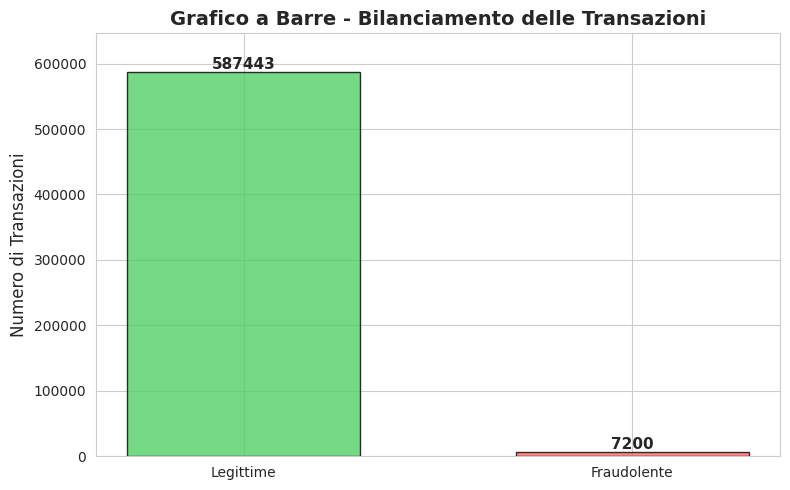

In [5]:
# Conteggio delle transazioni per tipo
transazioni = df['fraud'].value_counts()

plt.figure(figsize=(8, 5))
features = ['Legittime', 'Fraudolente']
colors = ['#51CF66', '#FF6B6B']
bars = plt.bar(features, transazioni.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

plt.ylabel('Numero di Transazioni', fontsize=12)
plt.title('Grafico a Barre - Bilanciamento delle Transazioni', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylim(0, max(transazioni.values)*1.1)
plt.tight_layout()
plt.show()

## 2. Profilo degli Importi: Distribuzione della Variabile Amount

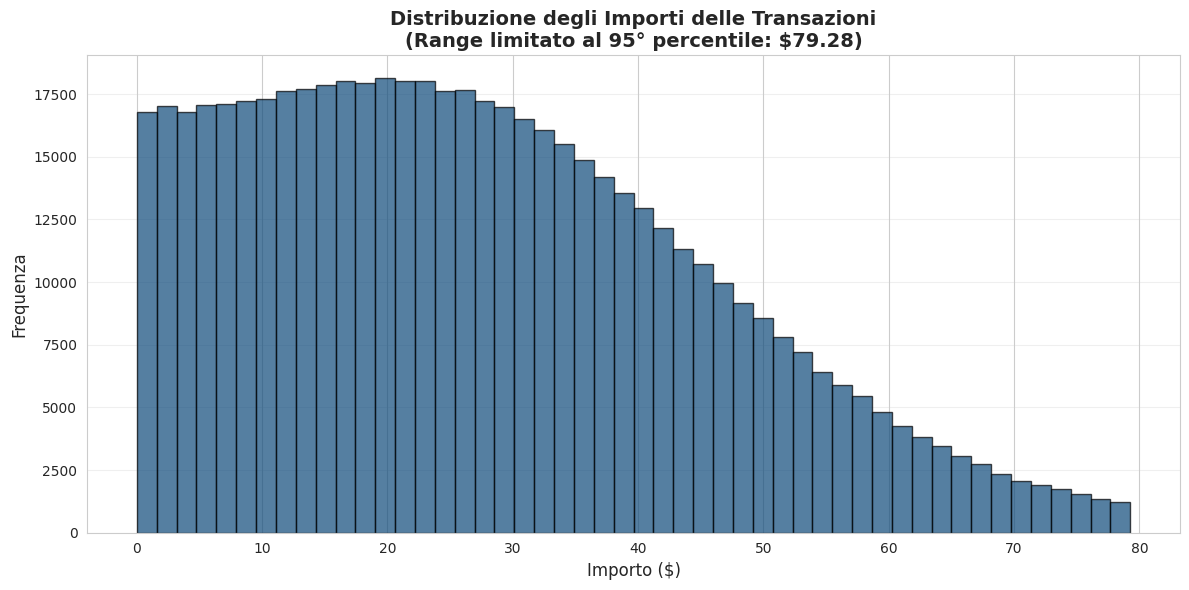

In [6]:
# Limita il range al 95° percentile per evitare valori estremi
limite = df['amount'].quantile(0.95)
filtro = df[df['amount'] <= limite]

plt.figure(figsize=(12, 6))
plt.hist(filtro['amount'], bins=50, color="#0d497a", edgecolor='black', alpha=0.7)
plt.xlabel('Importo ($)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title(f'Distribuzione degli Importi delle Transazioni\n(Range limitato al 95° percentile: ${limite:.2f})', 
          fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Confronto Finanziario: BoxPlot Amount vs Fraud

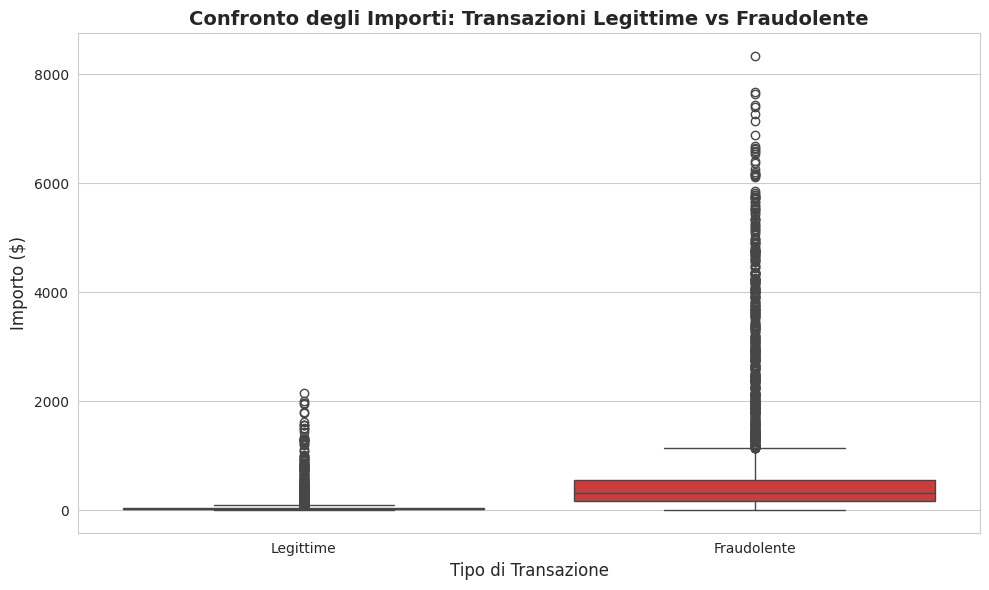

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud', y='amount', hue='fraud', palette=["#20CC3D", "#E02626"],legend=False)
plt.xlabel('Tipo di Transazione', fontsize=12)
plt.ylabel('Importo ($)', fontsize=12)
plt.title('Confronto degli Importi: Transazioni Legittime vs Fraudolente', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Legittime', 'Fraudolente'])
plt.tight_layout()
plt.show()

## 4. Analisi dei Volumi per Categoria

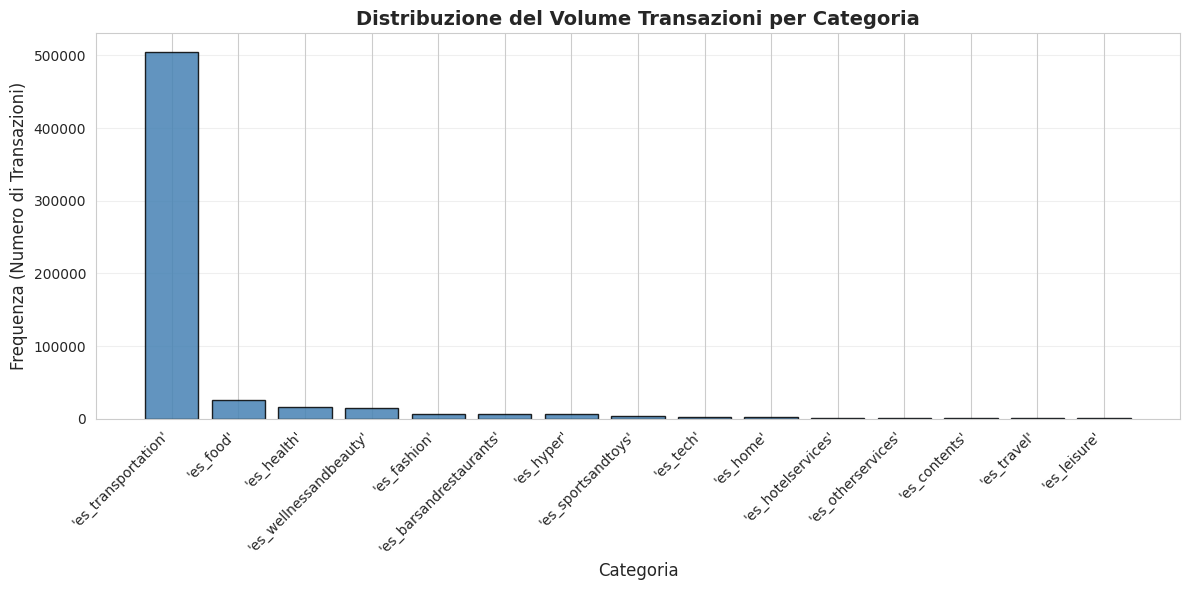

In [8]:
# Conta e ordina le categorie per frequenza
categoria = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(categoria.index, categoria.values, color='steelblue', edgecolor='black', alpha=0.85)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Frequenza (Numero di Transazioni)', fontsize=12)
plt.title('Distribuzione del Volume Transazioni per Categoria', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Focus sulle categorie a rischio: crea un grafico che isoli e mostri esclusivamente il numero di transazioni fraudolente suddivise per categoria, per identificare quali settori merceologici sono i bersagli preferiti dei truffatori.

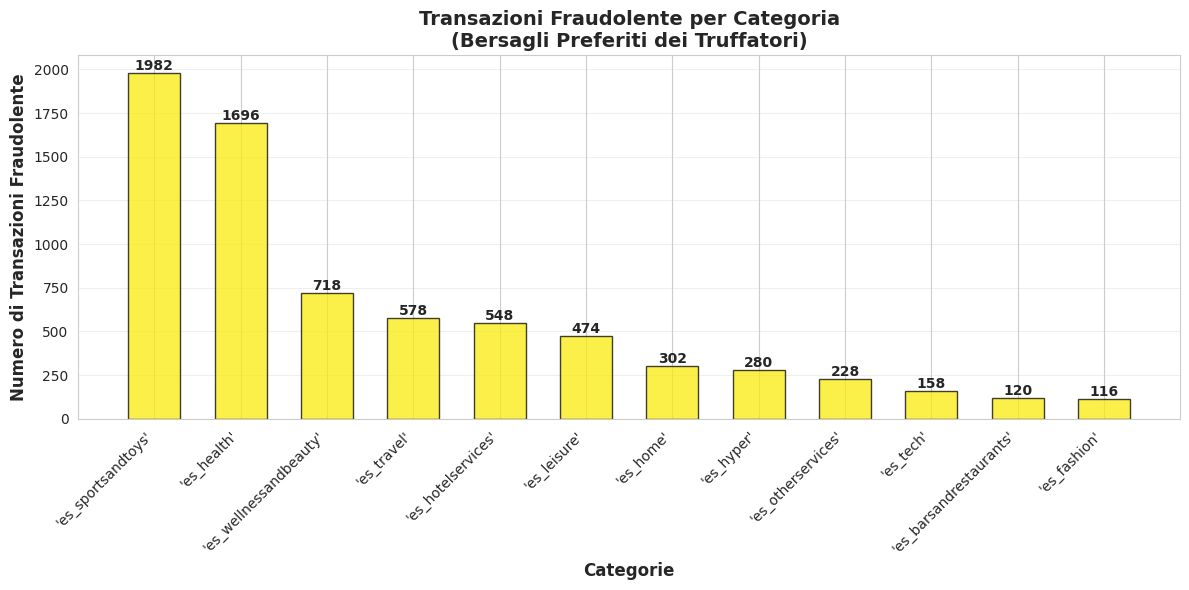

In [9]:
# Filtra solo le transazioni fraudolente
fraudolente = df[df['fraud'] == 1]
categoriefraudolente = fraudolente['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(categoriefraudolente.index, categoriefraudolente.values, 
               color="#FAEA0C", edgecolor='black', alpha=0.75, width=0.6)

plt.xlabel('Categorie', fontsize=12, fontweight='bold')
plt.ylabel('Numero di Transazioni Fraudolente', fontsize=12, fontweight='bold')
plt.title('Transazioni Fraudolente per Categoria\n(Bersagli Preferiti dei Truffatori)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Aggiungi valori sulle barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Mappa delle relazioni numeriche: calcola la matrice di correlazione tra le variabili numeriche e rappresentala con una heatmap, per scoprire se esiste un legame lineare tra l'importo e la probabilità di frode.

Matrice di Correlazione:
            step    amount     fraud
step    1.000000 -0.007961 -0.011898
amount -0.007961  1.000000  0.489967
fraud  -0.011898  0.489967  1.000000

Correlazione tra 'amount' e 'fraud':
0.4900


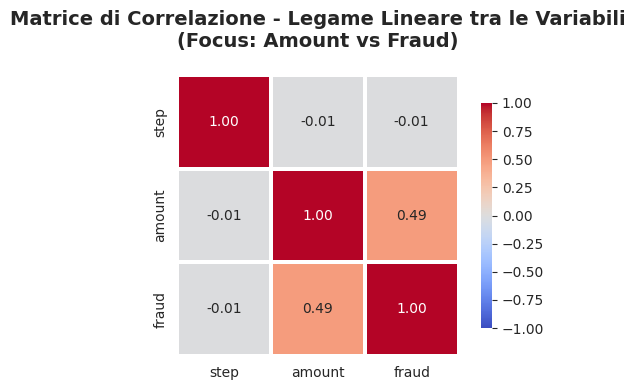

In [10]:
# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcola la matrice di correlazione
correlation_matrix = df[numeric_cols].corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

print("\nCorrelazione tra 'amount' e 'fraud':")
print(f"{correlation_matrix.loc['amount', 'fraud']:.4f}")

# Crea la heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Matrice di Correlazione - Legame Lineare tra le Variabili\n(Focus: Amount vs Fraud)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()